# 花哨的索引

利用简答的索引值可以修改数组，如arr[0], arr[:5], arr[arr > 0]

## 1. 探索花哨的索引

In [2]:
import numpy as np 
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


方法1

In [3]:
[x[3], x[7], x[2]]

[71, 86, 14]

方法2

In [4]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

**结果的形状与索引的一致**

In [5]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

**多维度的索引**

In [6]:
x = np.arange(12).reshape((3, 4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
x[row, col] # 即得到x[0, 2], x[1, 1], x[2, 3]

array([ 2,  5, 11])

索引遵守广播的规则,将一个行向量和列向量组合在一起  
得到一个广播后二维的结果  
index_array = [[0],   &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;              [[[0, 2], [0, 1], [0, 3]],  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;    [1],  [2, 1, 3]  ->  [[1, 2], [1, 1], [1, 3]],  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;               [2]]         &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;           [[2, 2], [2, 1], [2, 3]]]  

In [8]:
x[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

## 2.组合索引

In [9]:
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [10]:
x[2, [2, 0, 1]]

array([10,  8,  9])

In [11]:
x[1:, [2, 0, 1]]
# 行取1，2  列取2，0，1

array([[ 6,  4,  5],
       [10,  8,  9]])

In [12]:
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [13]:
mask = np.array([1, 0, 1, 0], dtype=bool)
x[row[:, np.newaxis], mask]
# 行取0，1，2  列取0，2

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## 3.示例：选择随机点  

从一个矩阵中选取行的子集

In [14]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
x = rand.multivariate_normal(mean, cov, 100) # 二维正态分布
x.shape

(100, 2)

In [15]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn; seaborn.set()

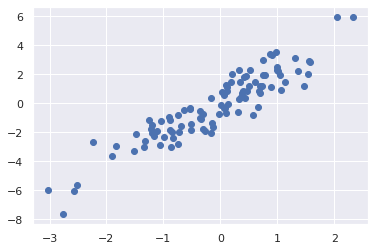

In [16]:
plt.scatter(x[:, 0], x[:, 1]);

In [17]:
indices = np.random.choice(x.shape[0], 20, replace=False)

In [18]:
indices

array([37, 92,  2, 19, 94, 90, 24, 87, 48, 27, 60, 32, 30, 76, 81,  6, 13,
       64, 67, 33])

In [19]:
selection = x[indices] #fancy index
selection.shape

(20, 2)

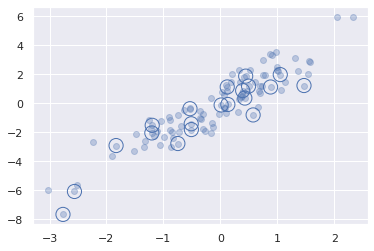

In [20]:
plt.scatter(x[:, 0], x[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
           facecolor='none', edgecolor='b', s=200)

## 4.以花哨的索引修改值

In [21]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [22]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


操作中重复的索引会导致意外

In [23]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

**真正的累加方法** 

In [25]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


## 5.示例：数据区间划分

可以有效的对数据区间进行划分并手动创建直方图
快速统计区间中的数据频次，用ufunc.at

In [35]:
np.random.seed(42)
x = np.random.randn(100)

# 手动计算直方图
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# 为每个x找到合适的区间
i = np.searchsorted(bins, x)

# 为每个区间加上1
np.add.at(counts, i, 1)

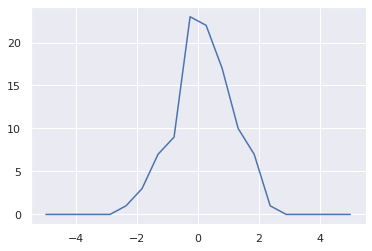

In [31]:
plt.plot(bins, counts, linestyle='-');

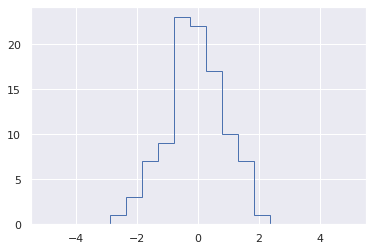

In [29]:
plt.hist(x, bins, histtype='step');kkkkjjjj

In [36]:
 # compare
 print("Numpy routine")
 %timeit counts, edges = np.histogram(x, bins)

 print("Custom routine")
 %timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Numpy routine
30.7 µs ± 233 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine
13.8 µs ± 31.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [38]:
  x = np.random.randn(1000000)
  print("Numpy routine:")
  %timeit counts, edges = np.histogram(x, bins)

  print("Custom routine:")
  %timeit np.add.at(counts, np.searchsorted(bins, x), 1)

Numpy routine:
75 ms ± 377 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
101 ms ± 1.03 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
